In [2]:
#基础性分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读取训练数据
origin_train_df = pd.read_csv("[new] yancheng_train_20171226.csv")
# 读取预测数据
origin_test_df = pd.read_csv("yancheng_testA_20171225.csv")

/Users/zhoujunwen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
origin_train_df.info()
origin_train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20157 entries, 0 to 20156
Data columns (total 32 columns):
sale_date                20157 non-null int64
class_id                 20157 non-null int64
sale_quantity            20157 non-null int64
brand_id                 20157 non-null int64
compartment              20157 non-null int64
type_id                  20157 non-null int64
level_id                 20157 non-null object
department_id            20157 non-null int64
TR                       20157 non-null object
gearbox_type             20157 non-null object
displacement             20157 non-null float64
if_charging              20157 non-null object
price_level              20157 non-null object
price                    20157 non-null object
driven_type_id           20157 non-null int64
fuel_type_id             20157 non-null object
newenergy_type_id        20157 non-null int64
emission_standards_id    20157 non-null int64
if_MPV_id                20157 non-null int64
if_luxur

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,department_id,displacement,driven_type_id,newenergy_type_id,...,if_luxurious_id,cylinder_number,car_length,car_width,car_height,total_quality,equipment_quality,wheelbase,front_track,rear_track
count,20157.000000,20157.000000,20157.00000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,...,20157.00000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000
mean,201490.186784,507410.234906,126.31205,643.293645,2.518033,1.860297,3.348316,1.728129,1.254552,1.008335,...,1.11971,4.038101,4577.579600,1790.405269,1552.624448,1876.938582,1414.852657,2706.141589,1538.063055,1538.027980
std,157.488965,234920.469728,231.13742,250.153093,0.528447,0.608067,1.552570,0.345978,0.562209,0.102218,...,0.32463,0.358240,266.704254,62.189750,124.673136,222.324373,208.956548,129.011827,55.662680,56.429887
min,201201.000000,103507.000000,5.00000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,3675.000000,1510.000000,1415.000000,1350.000000,925.000000,2360.000000,1280.000000,1290.000000
25%,201402.000000,304458.000000,16.00000,537.000000,2.000000,2.000000,2.000000,1.500000,1.000000,1.000000,...,1.00000,4.000000,4431.000000,1765.000000,1465.000000,1720.000000,1267.000000,2614.000000,1517.000000,1515.000000
50%,201506.000000,472603.000000,47.00000,750.000000,3.000000,2.000000,4.000000,1.600000,1.000000,1.000000,...,1.00000,4.000000,4598.000000,1802.000000,1484.000000,1835.000000,1390.000000,2690.000000,1549.000000,1550.000000
75%,201609.000000,692703.000000,142.00000,814.000000,3.000000,2.000000,4.000000,2.000000,1.000000,1.000000,...,1.00000,4.000000,4718.000000,1830.000000,1646.000000,2020.000000,1556.000000,2770.000000,1575.000000,1571.000000
max,201710.000000,978089.000000,6284.00000,985.000000,3.000000,4.000000,7.000000,3.600000,3.000000,4.000000,...,2.00000,6.000000,5266.000000,1942.000000,1960.000000,2520.000000,2005.000000,3108.000000,1655.000000,1671.000000


In [37]:
# 观察每辆车的销售记录跨度是否一致：跨度不一致，有些车辆跨度长，有些车辆跨度短
# 其余结论在输出中可以看到
id_set = []
print "训练集中一共有 %d 种车辆" % (len(origin_train_df["class_id"].unique()))
print "测试集中一共有 %d 种车辆" % (len(origin_test_df["class_id"].unique()))
print "计算每种车辆的时间跨度长短："
for class_id in origin_test_df["class_id"]:
    tmp = origin_train_df[origin_train_df["class_id"] == class_id]["sale_date"].unique()
    tmp.sort()
    diff = np.diff(tmp)
    flag = False
    for item in diff:
        if item != 1 and item != 89:
            id_set.append(class_id)
            flag = True
    if not flag:
        print "车辆id：%d，销售记录时间跨度：%d 个月" % (class_id, len(tmp))
    else:
        print "车辆id：%d，销售记录时间跨度：%d 个月，跨度不连续" % (class_id, len(tmp))
id_set = set(id_set)
print "销售记录不连续的车辆id："
print id_set
print "一共有 %d 种车辆的销售记录不连续" % len(id_set)
for class_id in id_set:
    tmp = origin_train_df[origin_train_df["class_id"] == class_id]["sale_date"].unique()
    tmp.sort()
    print class_id
    print tmp
    print np.diff(tmp)

训练集中一共有 140 种车辆
测试集中一共有 140 种车辆
计算每种车辆的时间跨度长短：
车辆id：103507，销售记录时间跨度：32 个月
车辆id：124140，销售记录时间跨度：42 个月
车辆id：125403，销售记录时间跨度：70 个月
车辆id：136916，销售记录时间跨度：70 个月
车辆id：169673，销售记录时间跨度：5 个月
车辆id：175962，销售记录时间跨度：59 个月
车辆id：178529，销售记录时间跨度：70 个月
车辆id：186250，销售记录时间跨度：21 个月
车辆id：194201，销售记录时间跨度：2 个月
车辆id：194450，销售记录时间跨度：69 个月，跨度不连续
车辆id：198427，销售记录时间跨度：53 个月，跨度不连续
车辆id：206765，销售记录时间跨度：28 个月
车辆id：209945，销售记录时间跨度：70 个月
车辆id：219195，销售记录时间跨度：39 个月
车辆id：221795，销售记录时间跨度：55 个月
车辆id：245609，销售记录时间跨度：19 个月
车辆id：248352，销售记录时间跨度：70 个月
车辆id：249875，销售记录时间跨度：12 个月
车辆id：250658，销售记录时间跨度：20 个月
车辆id：265980，销售记录时间跨度：69 个月
车辆id：270690，销售记录时间跨度：34 个月
车辆id：281301，销售记录时间跨度：70 个月
车辆id：281792，销售记录时间跨度：41 个月
车辆id：289386，销售记录时间跨度：41 个月
车辆id：289403，销售记录时间跨度：18 个月
车辆id：290854，销售记录时间跨度：70 个月
车辆id：291086，销售记录时间跨度：70 个月
车辆id：291514，销售记录时间跨度：60 个月，跨度不连续
车辆id：302513，销售记录时间跨度：12 个月
车辆id：304458，销售记录时间跨度：70 个月
车辆id：308913，销售记录时间跨度：52 个月
车辆id：321683，销售记录时间跨度：70 个月
车辆id：340175，销售记录时间跨度：4 个月
车辆id：347384，销售记录时间跨度：61 个月
车辆id：348641，销售记录时间跨度

In [55]:
# 按照class_id和sale_date分组，观察数据是否存在重复，重复数据在其他字段是否有区别
# 存在重复，同一种车型只有一种品牌，同一品牌会有多种车型

#origin_train_df.groupby(["class_id", "sale_date", "brand_id"]).count()
tmp = origin_train_df[["class_id", "brand_id"]].groupby(["class_id"]).aggregate(lambda x: len(set(x)))["brand_id"].values
tmp.sort()
print tmp

tmp = origin_train_df[["class_id", "brand_id"]].groupby(["brand_id"]).aggregate(lambda x: len(set(x)))["class_id"].values
tmp.sort()
print tmp

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5
  5  5  5  5  6  6  7  8  8  9 15]


In [56]:
# 四个字段需要注意'power' 'engine_torque' 'rated_passenger' 'TR'
# 第一个字段有三种记录方式：整型，浮点型，分数
# 第二个字段有四种记录方式：整型，浮点型，分数，-（估计是没有记录的意思）
# 第三个字段有两种记录方式：单个数值，范围
# 第四个字段有两种记录方式：单个数值，两个数值（不是很理解两个数值是什么意思）

In [177]:
print "每个车型下可能有几种箱型"
print origin_train_df[["sale_date", "class_id", "compartment"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["compartment"].unique()
# 结论是：每个车型下可能有1，2种箱型（可能有多种）
print "每个车型下可能有几种车型类别"
print origin_train_df[["sale_date", "class_id", "type_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["type_id"].unique()
# 结论是：一种车型下只有一中车型类别ID，估计带有“车型”的特征在一个车型下都是相同的
print "车型类别ID"
print origin_train_df["type_id"].unique()
print '车型级别ID'
print origin_train_df["level_id"].unique()
print origin_train_df[origin_train_df["level_id"] == "-"]["class_id"].unique()
print origin_train_df[origin_train_df["class_id"] == 178529]["level_id"].unique()
# class_id为178529的车没有记录箱型级别
print "车型系别:车系例如，日系车，韩系车，德系车等"
print origin_train_df["department_id"].unique()
print "商标ID"
print origin_train_df["brand_id"].unique()
print origin_train_df[["sale_date", "class_id", "brand_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["brand_id"].unique()
print "变速器档位类型"
print origin_train_df["TR"].unique()
print origin_train_df[["sale_date", "class_id", "TR"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["TR"].unique()
print "变速器形式类型"
print origin_train_df["gearbox_type"].unique()
print origin_train_df[["sale_date", "class_id", "gearbox_type"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["gearbox_type"].unique()
print "成交段类型"
print origin_train_df["price_level"].unique()
print origin_train_df[["sale_date", "class_id", "price_level"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["price_level"].unique()
# 各成交段之间不相交
print "驱动形式类型"
print origin_train_df["driven_type_id"].unique()
print origin_train_df[["sale_date", "class_id", "driven_type_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["driven_type_id"].unique()
print "燃料种类类型"
origin_train_df["fuel_type_id"] = origin_train_df["fuel_type_id"].apply(lambda x: str(x))
print origin_train_df["fuel_type_id"].unique()
print origin_train_df[["sale_date", "class_id", "fuel_type_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["fuel_type_id"].unique()
print "新能源类型ID"
print origin_train_df["newenergy_type_id"].unique()
print origin_train_df[["sale_date", "class_id", "newenergy_type_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["newenergy_type_id"].unique()
print "新能源类型种类和燃料种类进行交叉观察"
print "1. 同一种燃料内会不会有多种新能源种类ID"
print origin_train_df[origin_train_df["fuel_type_id"] != "-"][["fuel_type_id", "newenergy_type_id"]].groupby(["fuel_type_id"]).aggregate(
    lambda x: len(set(x)))["newenergy_type_id"].unique()
print "2. 用一种新能源id内会不会有多种燃料种类"
print origin_train_df[["fuel_type_id", "newenergy_type_id"]].groupby(["newenergy_type_id"]).aggregate(
    lambda x: len(set(x)))["fuel_type_id"].unique()
print "结论：只能将“燃料种类”和“新能源类型”作为两种划分燃料种类的方式，但具体是怎么对应的未知"
print "排放标准ID"
print origin_train_df["emission_standards_id"].unique()
print origin_train_df[["sale_date", "class_id", "emission_standards_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["emission_standards_id"].unique()
print "是否微客MPV"
print origin_train_df["if_MPV_id"].unique()
print origin_train_df[["sale_date", "class_id", "if_MPV_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["if_MPV_id"].unique()
print "是否豪华ID"
print origin_train_df["if_luxurious_id"].unique()
print origin_train_df[["sale_date", "class_id", "if_luxurious_id"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["if_luxurious_id"].unique()
print "是否增压"
print origin_train_df["if_charging"].unique()
print origin_train_df[["sale_date", "class_id", "if_charging"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["if_charging"].unique()
print "功率类型"
def charge_power(power):
    power = str(power)
    if power == "-":
        return -1
    if "/" in power:
        # 分数表示法（两种类型）
        return (float(power.split("/")[0]) + float(power.split("/")[1])) / 2
    else:
        return float(power)
origin_train_df["power"] = origin_train_df["power"].apply(charge_power)
print origin_train_df["power"].unique()
print origin_train_df[["sale_date", "class_id", "power"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["power"].unique()
print "缸数类型"
print origin_train_df["cylinder_number"].unique()
print origin_train_df[["sale_date", "class_id", "cylinder_number"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["cylinder_number"].unique()
print "去掉缸数为0的样本后"
print origin_train_df[origin_train_df["cylinder_number"] != 0]["cylinder_number"].unique()
print origin_train_df[origin_train_df["cylinder_number"] != 0][["sale_date", "class_id", "cylinder_number"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["cylinder_number"].unique()
print "发动机扭矩类型"
origin_train_df["engine_torque"] = origin_train_df["engine_torque"].apply(charge_power)
print origin_train_df["engine_torque"].unique()
print origin_train_df[["sale_date", "class_id", "engine_torque"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["engine_torque"].unique()
print origin_train_df[origin_train_df["class_id"] == 527765]["engine_torque"].unique()
# 车型ID是527765的车型的发动机扭矩都是-1，源数据记录的是“-”
print "车长类型"
print origin_train_df["car_length"].unique()
print origin_train_df[["sale_date", "class_id", "car_length"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["car_length"].unique()
print "车宽类型"
print origin_train_df["car_width"].unique()
print origin_train_df[["sale_date", "class_id", "car_width"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["car_width"].unique()
print "车高类型"
print origin_train_df["car_height"].unique()
print origin_train_df[["sale_date", "class_id", "car_height"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["car_height"].unique()
print "总质量类型"
print origin_train_df["total_quality"].unique()
print origin_train_df[["sale_date", "class_id", "total_quality"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["total_quality"].unique()
print "整备质量类型"
# 对于轿车，汽车总质量 = 整备质量 + 驾驶员及乘员质量 + 行李质量
# 对于客车，汽车总质量 = 整备质量 + 驾驶员及乘员质量 + 行李质量 + 附件质量
# 对于货车，汽车总质量 = 整备质量 + 驾驶员及助手质量 + 行李质量
print origin_train_df["equipment_quality"].unique()
print origin_train_df[["sale_date", "class_id", "equipment_quality"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["equipment_quality"].unique()
print "额定载客类型"
print origin_train_df["rated_passenger"].unique()
print origin_train_df[["sale_date", "class_id", "rated_passenger"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["rated_passenger"].unique()
print "轴距类型"
print origin_train_df["wheelbase"].unique()
print origin_train_df[["sale_date", "class_id", "wheelbase"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["wheelbase"].unique()
print "前轮距类型"
print origin_train_df["front_track"].unique()
print origin_train_df[["sale_date", "class_id", "front_track"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["front_track"].unique()
print "后轮距类型"
print origin_train_df["rear_track"].unique()
print origin_train_df[["sale_date", "class_id", "rear_track"]].groupby(["sale_date", "class_id"]).aggregate(
    lambda x: len(set(x)))["rear_track"].unique()
print "离散后的车长"
def charge_car_length(length):
    if length <= 4000:
        return "A"
    elif length <= 4500:
        return "B"
    elif length <= 4800:
        return "C"
    elif length <= 5000:
        return "D"
    elif length <= 5200:
        return "E"
    else:
        return "F"
tmp = origin_train_df[["sale_date", "class_id", "car_length"]].copy()
tmp["car_length"] = tmp["car_length"].apply(charge_car_length)
print tmp.groupby(["sale_date", "class_id"]).aggregate(lambda x: len(set(x)))["car_length"].unique()
# 发现少部分样本出现同一个车型下有两种车长，这其中有一部分样本的车型下，一种车长的车的销量远大于另一种车长
# 暂定将存在两种车长的车型，取销量较大的车长作为其代表车长

每个车型下可能有几种箱型
[1 2]
每个车型下可能有几种车型类别
[1]
车型类别ID
[1 2 3 4]
车型级别ID
['1' '2' '3' '4' '-' '5']
[178529]
['-']
车型系别:车系例如，日系车，韩系车，德系车等
[1 2 3 4 5 6 7]
商标ID
[ 12 637 831 750  98 537 807 638  75 106 450 872 953 985 864 304 692 761
 836 290 783 814 497 813 923 512 498 841 542 236 294  49 126  68 682  76]
[1]
变速器档位类型
['6' '5' '0' '8' '7' '9' '4' '1' '8;7' '5;4']
[1 3 2 4]
变速器形式类型
['MT' 'DCT' 'AT' 'CVT' 'AMT' 'AT;DCT' 'MT;AT']
[1 2 3]
成交段类型
['8-10W' '10-15W' '5WL' '15-20W' '5-8W' '25-35W' '35-50W' '20-25W' '50-75W']
[1 2 3]
驱动形式类型
[1 2 3]
[1 2]
燃料种类类型
['1' '2' '3' '4' '-']
[1 2]
新能源类型ID
[1 2 3 4]
[1 2]
新能源类型种类和燃料种类进行交叉观察
1. 同一种燃料内会不会有多种新能源种类ID
[1 2]
2. 用一种新能源id内会不会有多种燃料种类
[3 1]
结论：只能将“燃料种类”和“新能源类型”作为两种划分燃料种类的方式，但具体是怎么对应的未知
排放标准ID
[1 2 3 5]
[1 2 3]
是否微客MPV
[2 1]
[1]
是否豪华ID
[1 2]
[1]
是否增压
['L' 'T']
[1 2]
功率类型
[  98.     94.    105.     81.     82.    114.    101.     80.    110.
  193.     90.     84.    132.    155.    100.    115.     83.     93.8
   93.     96.    187.    162.     86.    133.     8

[ 2  5  6  4  3  1  7  8  9 10 12 11 13]
额定载客类型
['5' '7-8' '7' '6-7' '6-8' '4' '4-5' '5-7' '5-8' '9']
[1 4 6 2 3]
轴距类型
[2700 2648 2770 2603 2720 2620 2650 2560 2857 2662 2629 2873 2675 3000 2610
 3088 2680 2803 2750 2612 2690 2800 2775 2640 2807 2920 3079 2730 2860 2687
 2637 2670 3108 2780 2850 2555 2590 2656 2530 2510 2651 2684 2905 2614 2869
 2699 2550 2790 2737 2685 3012 2805 2600 2908 2470 2871 2570 2646 2829 2837
 2661 2660 2840 2812 2815 2820 2810 2631 2795 2500 2939 2604 2705 2360 2791
 2636 2715 3014 2585 2725 2760 2950 2900 2630 2945 2710 2578 2602 2465 2471
 2460]
[1 2 3]
前轮距类型
[1556 1553 1579 1460 1420 1580 1575 1502 1525 1645 1535 1540 1539 1617 1555
 1601 1445 1593 1565 1549 1577 1554 1517 1563 1541 1585 1614 1572 1596 1560
 1551 1500 1537 1562 1600 1561 1586 1578 1425 1557 1430 1495 1547 1527 1530
 1569 1538 1599 1550 1518 1584 1564 1558 1488 1545 1480 1450 1630 1602 1566
 1463 1567 1544 1511 1543 1574 1606 1490 1531 1548 1620 1552 1590 1290 1625
 1652 1595 1612 1597 152

In [162]:
show_df = tmp.groupby(["sale_date", "class_id"]).aggregate(lambda x: len(set(x)))
tmp2 = origin_train_df[["sale_date", "class_id", "sale_quantity"]].groupby(["sale_date", "class_id"]).sum()
show_df["sale_quantity"] = tmp2["sale_quantity"]
show_df[show_df["car_length"] == 2]

car_length  sale_quantity
sale_date class_id                           
201201    178529             2           1739
          576298             2            301
          713651             2            192
          914348             2            660
201202    576298             2            436
          914348             2            307
201203    178529             2           1248
          576298             2            412
          914348             2            316
201204    576298             2            499
          713651             2             99
          914348             2            195
201205    576298             2            625
          914348             2            326
201206    576298             2            491
          745137             2            214
          914348             2            289
201207    576298             2            767
          745137             2            352
          914348             2            345
201208    576298             2            640
          745137             2            377
          914348             2            391
201209    576298             2            657
          745137             2            476
          914348             2            409
201210    576298             2            633
          745137             2            689
          914348             2            502
201211    576298             2            616
...                        ...            ...
201705    978089             2            512
201706    289386             2            314
          349023             2            612
          516750             2             26
          527809             2            206
          576298             2            231
          745137             2            646
          978089             2            381
201707    289386             2            334
          349023             2            786
          516750             2             47
          576298             2            310
          745137             2            859
          978089             2            270
201708    289386             2            284
          349023             2            679
          516750             2             38
          527809             2            276
          559132             2            104
          576298             2            270
          745137             2            780
          978089             2            419
201709    289386             2            305
          349023             2            941
          527809             2            305
          576298             2            293
          745137             2            911
          961962             2            122
          978089             2            401
201710    745137             2            852

[336 rows x 2 columns]

In [167]:
show_df = pd.get_dummies(tmp)
show_df["sale_quantity"] = origin_train_df["sale_quantity"]
for idx in ["A", "B", "C", "D", "E", "F"]:
    show_df["car_length" + "_" + idx] = show_df["car_length" + "_" + idx] * show_df["sale_quantity"]
del show_df["sale_quantity"]
show_df = show_df.groupby(["sale_date", "class_id"]).sum()
show_df.loc[(201201, 713651), :]

car_length_A      0
car_length_B      6
car_length_C    186
car_length_D      0
car_length_E      0
car_length_F      0
Name: (201201, 713651), dtype: int64

In [128]:
# 观察不同月份的销量变化幅度
print "观察相邻的两个月之间同车型销量的RMSE"
def charge_sale_date(date):
    year = date / 100
    month = date % 100
    return (year - 2012) * 12 + month
sales_df = origin_train_df[["sale_date", "class_id", "sale_quantity"]].copy()
sales_df["sale_date_transfer"] = sales_df["sale_date"].apply(charge_sale_date)
for month in range(70):
    print "从2012年1月开始的第%d个月" % month
    sales_tmp1 = sales_df[sales_df["sale_date_transfer"] == month][["class_id", "sale_quantity"]].groupby(
        ["class_id"]).sum().copy()
    sales_tmp2 = sales_df[sales_df["sale_date_transfer"] == month - 1][["class_id", "sale_quantity"]].groupby(
        ["class_id"]).sum().copy()
    if sales_tmp2.size > 0:
        concat = sales_tmp1.join(sales_tmp2, rsuffix="_x", how="inner")
        print "该月和前一个月对应车型销量之间的RMSE为 %f" % np.sqrt(np.average(np.power(concat["sale_quantity"] - concat["sale_quantity_x"], 2)))

观察相邻的两个月之间同车型销量的RMSE
从2012年1月开始的第0个月
从2012年1月开始的第1个月
从2012年1月开始的第2个月
该月和前一个月对应车型销量之间的RMSE为 290.712917
从2012年1月开始的第3个月
该月和前一个月对应车型销量之间的RMSE为 119.204241
从2012年1月开始的第4个月
该月和前一个月对应车型销量之间的RMSE为 136.403312
从2012年1月开始的第5个月
该月和前一个月对应车型销量之间的RMSE为 211.294581
从2012年1月开始的第6个月
该月和前一个月对应车型销量之间的RMSE为 145.979606
从2012年1月开始的第7个月
该月和前一个月对应车型销量之间的RMSE为 122.821100
从2012年1月开始的第8个月
该月和前一个月对应车型销量之间的RMSE为 131.339255
从2012年1月开始的第9个月
该月和前一个月对应车型销量之间的RMSE为 102.414626
从2012年1月开始的第10个月
该月和前一个月对应车型销量之间的RMSE为 196.332460
从2012年1月开始的第11个月
该月和前一个月对应车型销量之间的RMSE为 216.890862
从2012年1月开始的第12个月
该月和前一个月对应车型销量之间的RMSE为 261.084473
从2012年1月开始的第13个月
该月和前一个月对应车型销量之间的RMSE为 523.879720
从2012年1月开始的第14个月
该月和前一个月对应车型销量之间的RMSE为 493.764762
从2012年1月开始的第15个月
该月和前一个月对应车型销量之间的RMSE为 126.729712
从2012年1月开始的第16个月
该月和前一个月对应车型销量之间的RMSE为 131.606056
从2012年1月开始的第17个月
该月和前一个月对应车型销量之间的RMSE为 248.266366
从2012年1月开始的第18个月
该月和前一个月对应车型销量之间的RMSE为 298.114286
从2012年1月开始的第19个月
该月和前一个月对应车型销量之间的RMSE为 161.897601
从2012年1月开始的第20个月
该月和前一个月对应车型销量之间的RMSE为 92.479148
从2012年

车型ID：289403


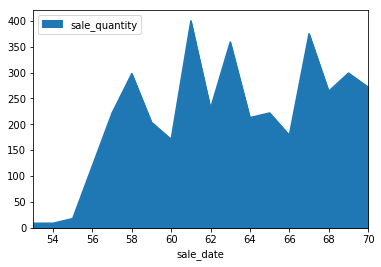

序列长度：18
序列方差：114.642345
序列均值：214.722222
车型ID：745137


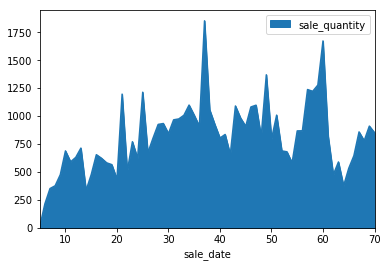

序列长度：66
序列方差：317.754780
序列均值：809.257576
车型ID：714860


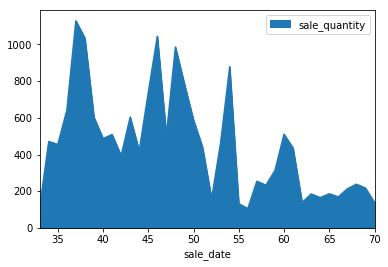

序列长度：38
序列方差：286.271257
序列均值：449.368421
车型ID：175962


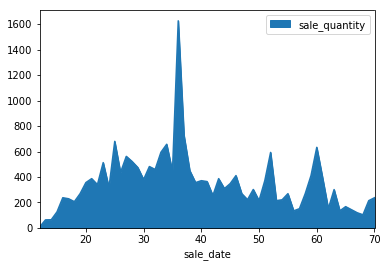

序列长度：59
序列方差：234.614628
序列均值：349.898305
车型ID：270690


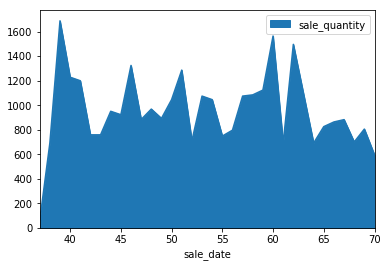

序列长度：34
序列方差：305.397473
序列均值：957.029412
车型ID：290854


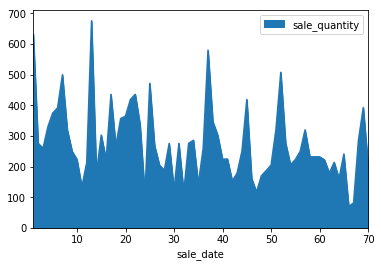

序列长度：70
序列方差：122.782173
序列均值：275.371429
车型ID：692703


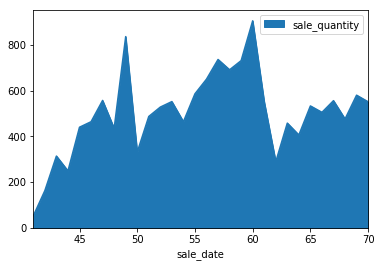

序列长度：30
序列方差：180.791350
序列均值：502.566667
车型ID：978089


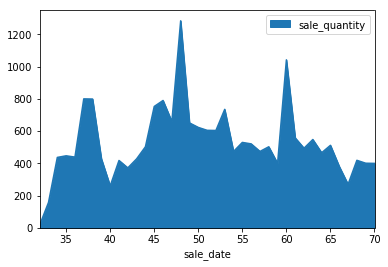

序列长度：39
序列方差：221.229471
序列均值：528.333333
车型ID：219195


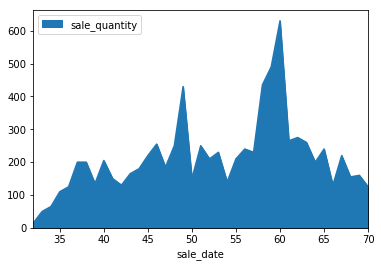

序列长度：39
序列方差：115.494961
序列均值：213.205128
车型ID：851857


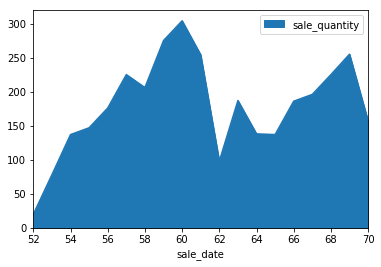

序列长度：19
序列方差：68.967574
序列均值：179.000000
车型ID：304458


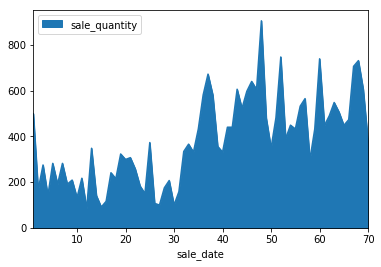

序列长度：70
序列方差：191.392084
序列均值：378.885714
车型ID：349023


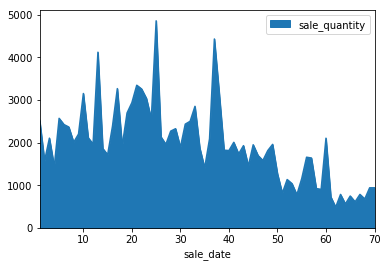

序列长度：70
序列方差：909.774124
序列均值：1945.985714
车型ID：281792


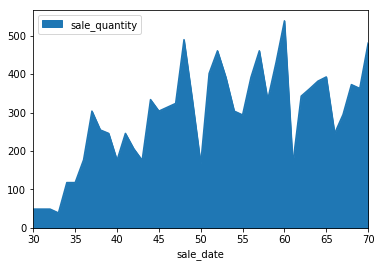

序列长度：41
序列方差：128.499398
序列均值：289.951220
车型ID：510309


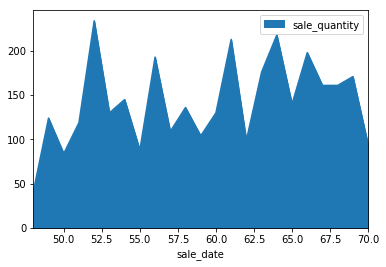

序列长度：23
序列方差：47.591480
序列均值：142.086957
车型ID：379876


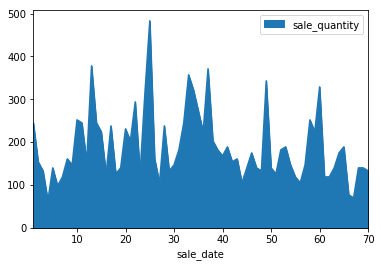

序列长度：70
序列方差：81.312299
序列均值：187.900000
车型ID：750340


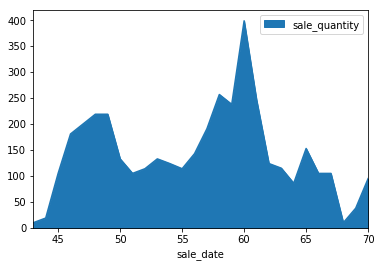

序列长度：28
序列方差：83.130859
序列均值：142.214286
车型ID：576298


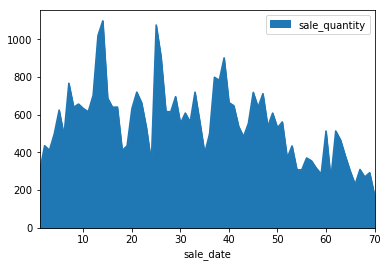

序列长度：70
序列方差：196.396715
序列均值：551.042857
车型ID：347384


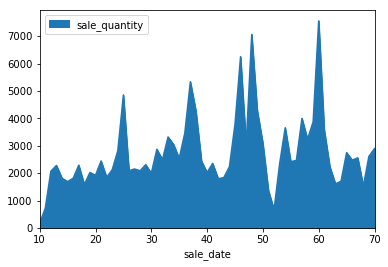

序列长度：61
序列方差：1348.164260
序列均值：2724.475410
车型ID：354068


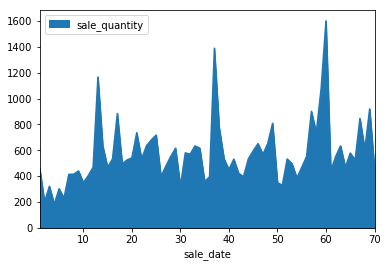

序列长度：70
序列方差：243.217231
序列均值：571.914286
车型ID：416749


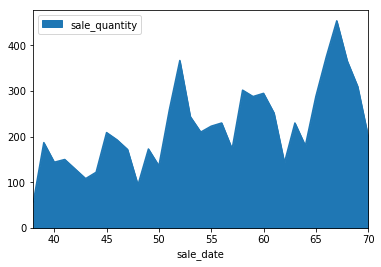

序列长度：33
序列方差：89.101494
序列均值：220.121212
车型ID：125403


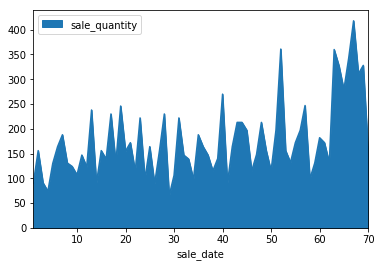

序列长度：70
序列方差：75.448861
序列均值：175.428571
车型ID：409854


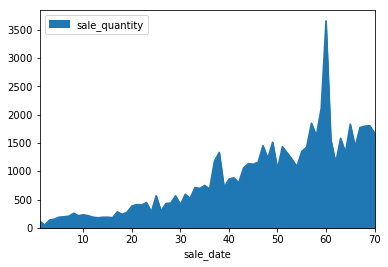

序列长度：70
序列方差：660.730225
序列均值：869.357143
车型ID：786351


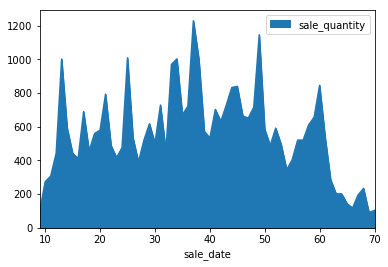

序列长度：62
序列方差：259.817634
序列均值：557.919355
车型ID：281301


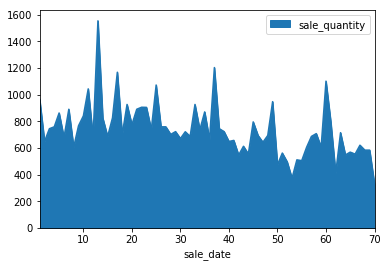

序列长度：70
序列方差：199.410644
序列均值：735.628571
车型ID：654134


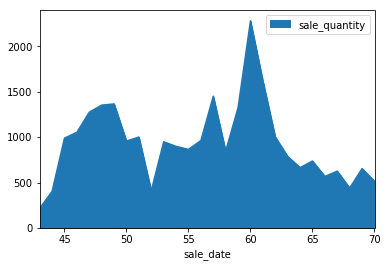

序列长度：28
序列方差：429.457043
序列均值：936.071429
车型ID：425432


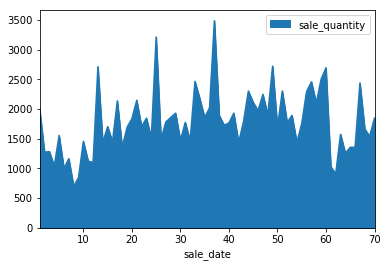

序列长度：70
序列方差：528.544253
序列均值：1781.828571
车型ID：871642


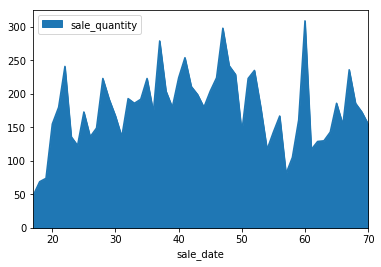

序列长度：54
序列方差：54.449411
序列均值：177.240741
车型ID：559132


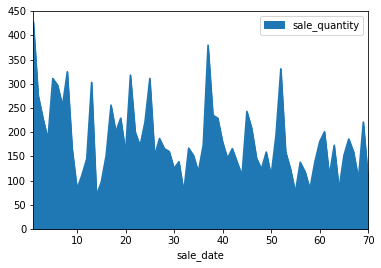

序列长度：70
序列方差：75.685608
序列均值：181.785714
车型ID：819061


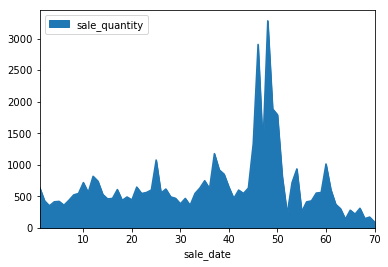

序列长度：70
序列方差：530.617880
序列均值：666.471429
车型ID：482497


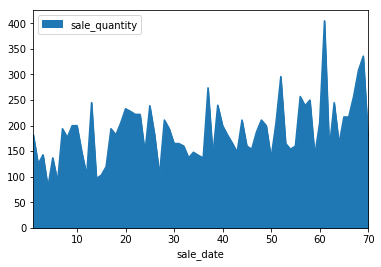

序列长度：70
序列方差：57.887979
序列均值：187.557143
车型ID：614059


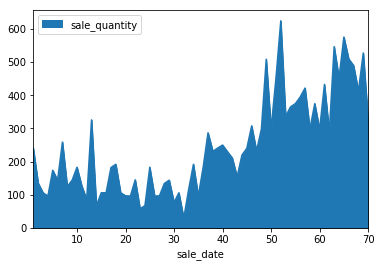

序列长度：70
序列方差：145.978232
序列均值：243.314286
车型ID：527809


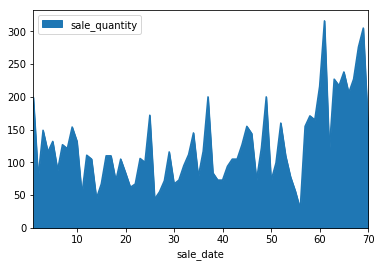

序列长度：70
序列方差：61.619274
序列均值：125.528571
车型ID：472603


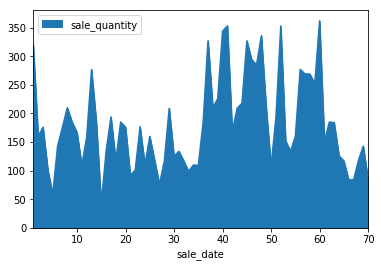

序列长度：70
序列方差：79.756574
序列均值：180.342857
车型ID：124140


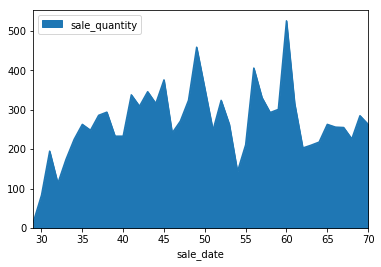

序列长度：42
序列方差：90.640368
序列均值：267.547619
车型ID：291514


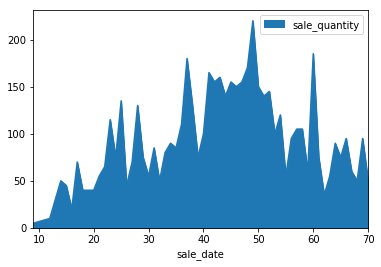

序列长度：60
序列方差：48.092142
序列均值：92.750000
车型ID：693436


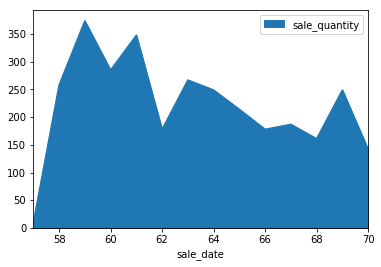

序列长度：14
序列方差：87.982634
序列均值：221.357143
车型ID：649213


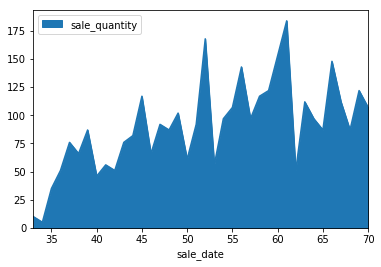

序列长度：38
序列方差：39.188593
序列均值：90.131579
车型ID：854079


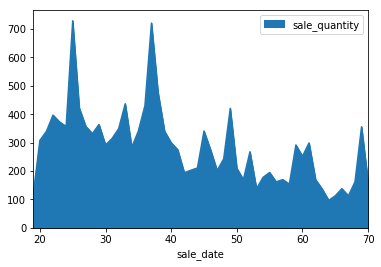

序列长度：52
序列方差：132.454842
序列均值：282.442308
车型ID：453752


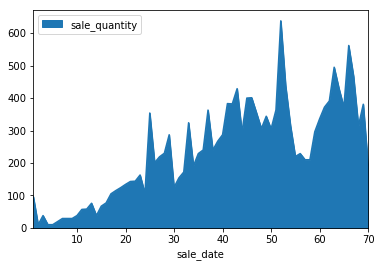

序列长度：69
序列方差：147.149549
序列均值：237.768116
车型ID：587678


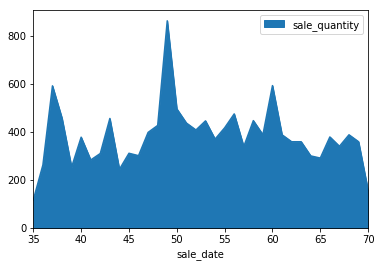

序列长度：36
序列方差：127.707553
序列均值：382.944444
车型ID：924154


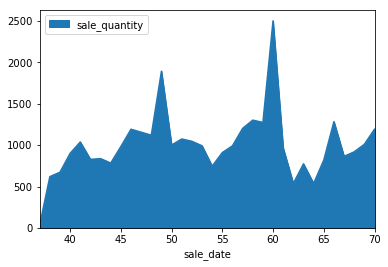

序列长度：34
序列方差：397.385313
序列均值：1000.029412
车型ID：628041


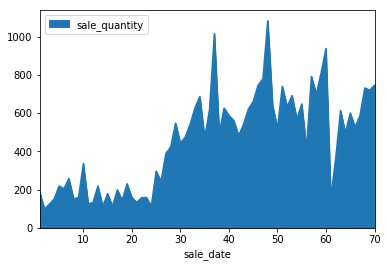

序列长度：70
序列方差：252.375530
序列均值：452.614286
车型ID：437598


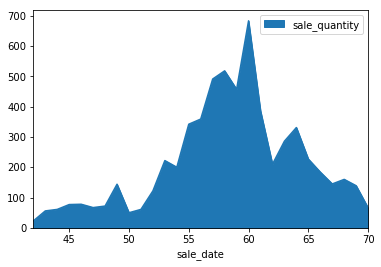

序列长度：29
序列方差：165.896605
序列均值：214.379310
车型ID：378356


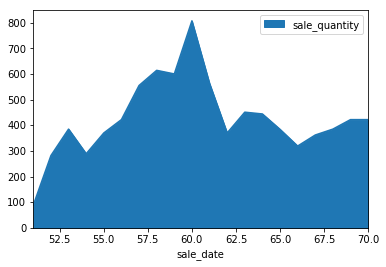

序列长度：20
序列方差：146.149538
序列均值：426.750000
车型ID：209945


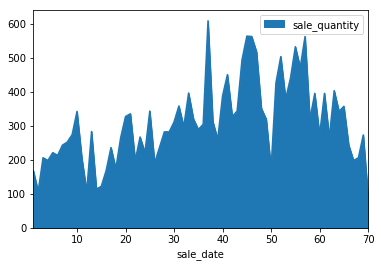

序列长度：70
序列方差：119.605631
序列均值：308.514286
车型ID：732758


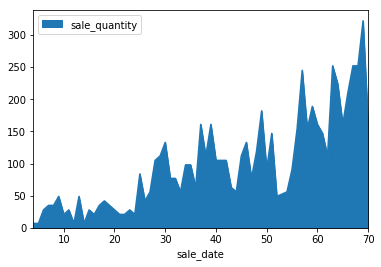

序列长度：66
序列方差：72.740954
序列均值：98.106061
车型ID：245609


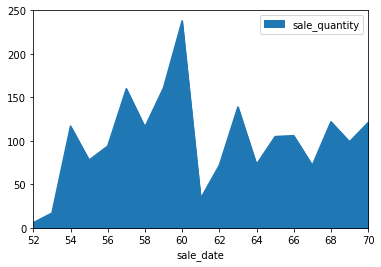

序列长度：19
序列方差：52.449791
序列均值：101.578947
车型ID：356986


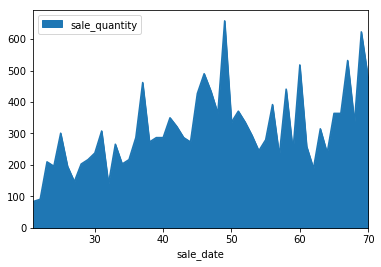

序列长度：50
序列方差：122.041863
序列均值：312.060000
车型ID：905745


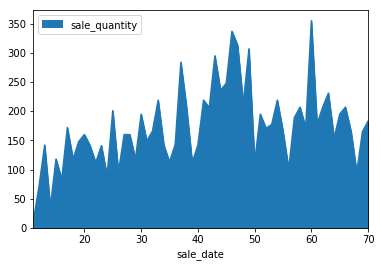

序列长度：60
序列方差：67.528042
序列均值：172.783333
车型ID：540712


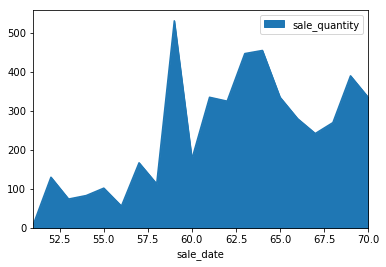

序列长度：20
序列方差：146.440295
序列均值：242.800000
车型ID：265980


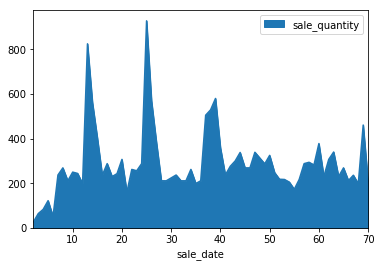

序列长度：69
序列方差：148.759093
序列均值：287.086957
车型ID：103507


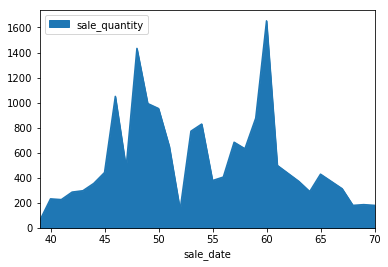

序列长度：32
序列方差：368.274130
序列均值：533.906250
车型ID：516750


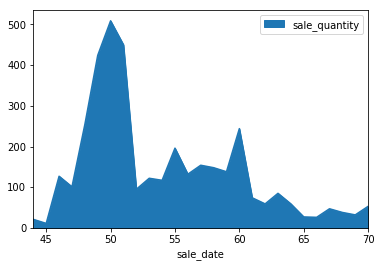

序列长度：27
序列方差：130.535407
序列均值：138.629630
车型ID：412240


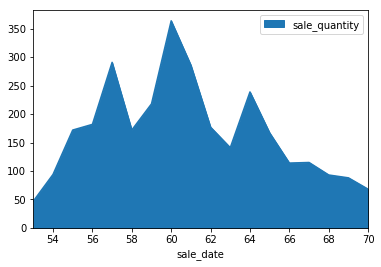

序列长度：18
序列方差：82.970916
序列均值：168.222222
车型ID：591790


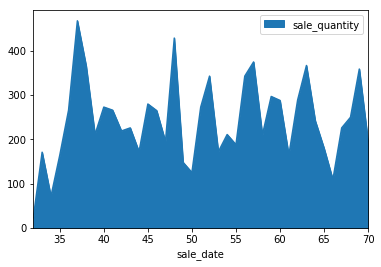

序列长度：39
序列方差：93.489029
序列均值：241.512821
车型ID：350259


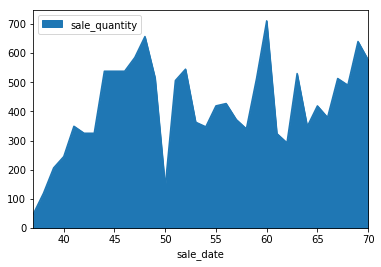

序列长度：34
序列方差：153.828931
序列均值：417.205882
车型ID：713651


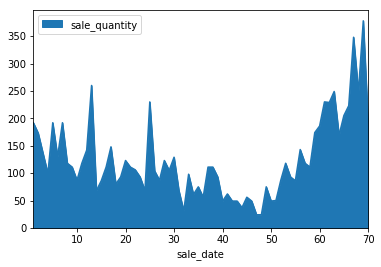

序列长度：70
序列方差：71.931613
序列均值：123.985714
车型ID：671482


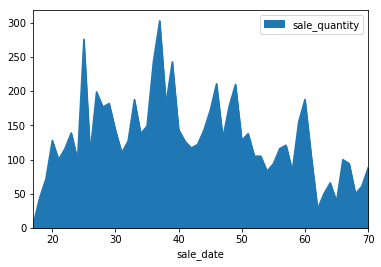

序列长度：54
序列方差：60.233419
序列均值：130.166667
车型ID：221795


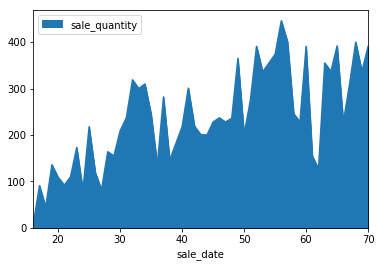

序列长度：55
序列方差：105.551106
序列均值：237.381818
车型ID：492952


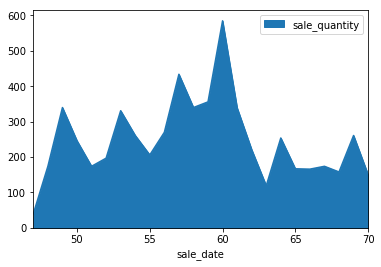

序列长度：24
序列方差：112.768191
序列均值：248.458333
车型ID：580634


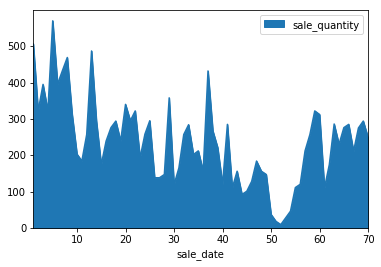

序列长度：69
序列方差：115.630564
序列均值：238.913043
车型ID：496459


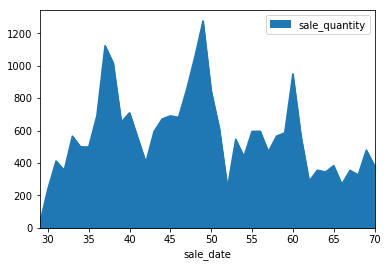

序列长度：42
序列方差：254.207029
序列均值：566.690476
车型ID：321683


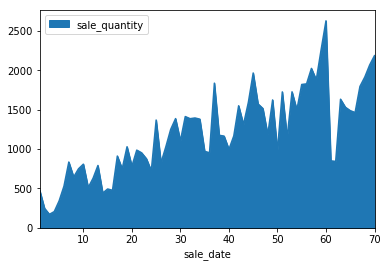

序列长度：70
序列方差：537.906448
序列均值：1197.100000
车型ID：714152


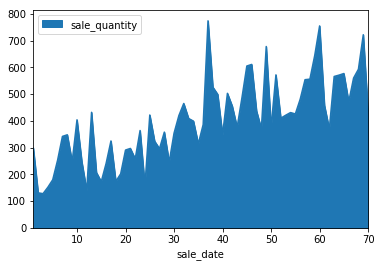

序列长度：70
序列方差：154.635236
序列均值：399.971429
车型ID：735971


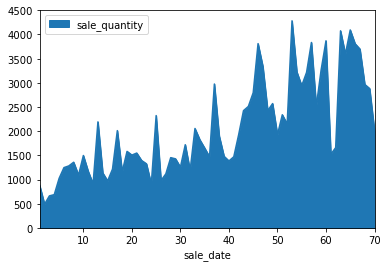

序列长度：70
序列方差：988.431285
序列均值：2037.228571
车型ID：384924


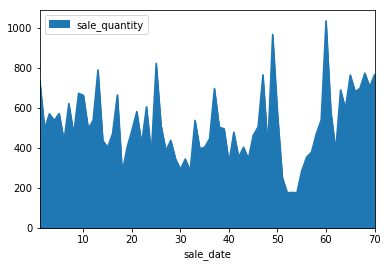

序列长度：70
序列方差：177.728806
序列均值：509.414286
车型ID：739296


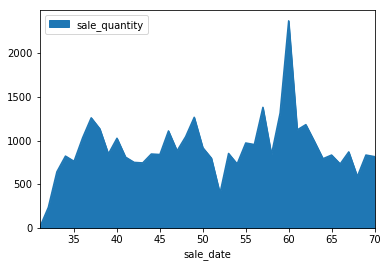

序列长度：40
序列方差：352.603740
序列均值：908.550000
车型ID：289386


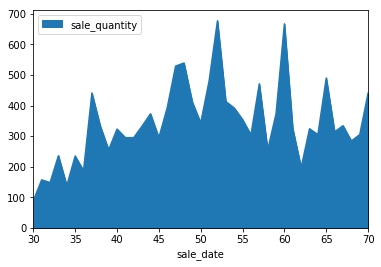

序列长度：41
序列方差：127.098776
序列均值：342.731707
车型ID：392593


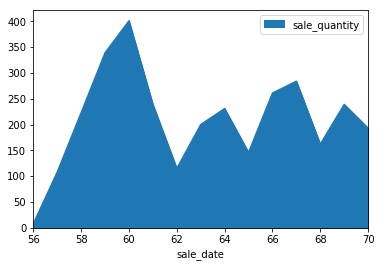

序列长度：15
序列方差：93.278412
序列均值：209.933333
车型ID：963845


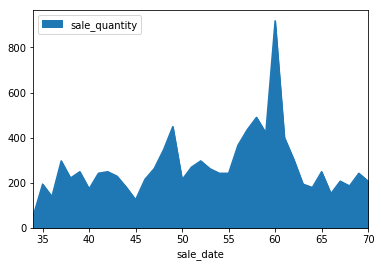

序列长度：37
序列方差：142.376070
序列均值：273.027027
车型ID：580470


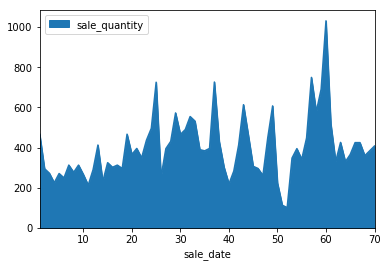

序列长度：70
序列方差：154.341670
序列均值：397.185714
车型ID：741152


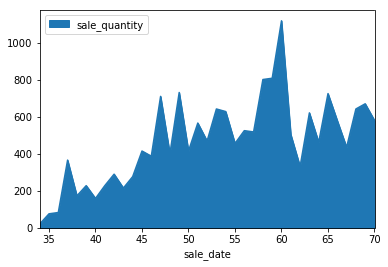

序列长度：37
序列方差：233.271105
序列均值：466.324324
车型ID：682651


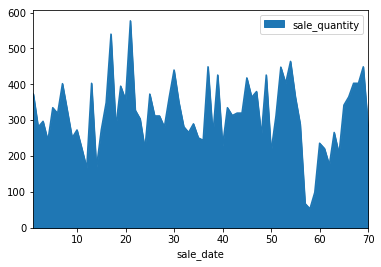

序列长度：70
序列方差：97.146766
序列均值：314.385714
车型ID：401052


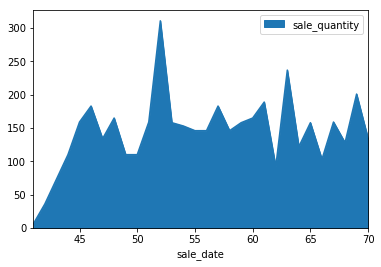

序列长度：30
序列方差：55.265259
序列均值：144.466667
车型ID：526401


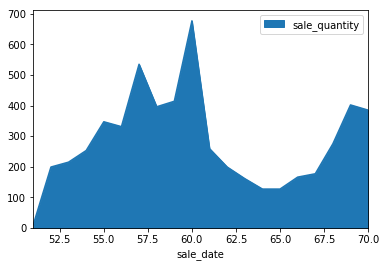

序列长度：20
序列方差：152.048545
序列均值：282.800000
车型ID：379265


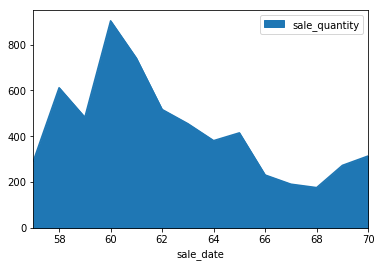

序列长度：14
序列方差：204.668635
序列均值：427.500000
车型ID：961962


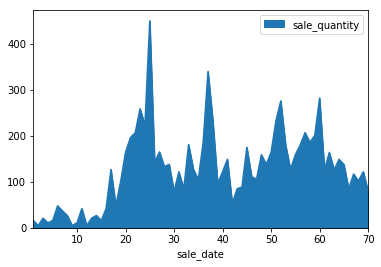

序列长度：70
序列方差：84.637630
序列均值：126.414286
车型ID：560265


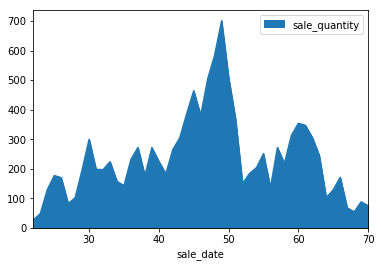

序列长度：49
序列方差：141.360702
序列均值：237.734694
车型ID：291086


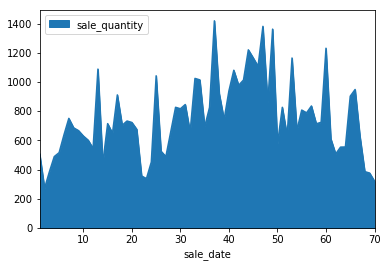

序列长度：70
序列方差：265.435216
序列均值：754.942857
车型ID：651347


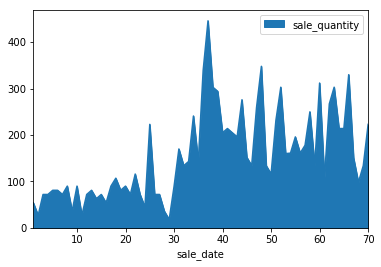

序列长度：70
序列方差：94.470297
序列均值：154.385714
车型ID：948936


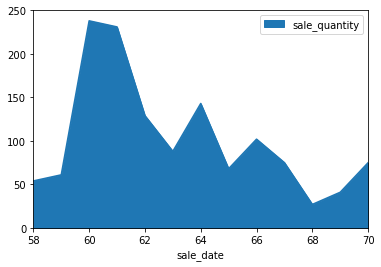

序列长度：13
序列方差：64.262222
序列均值：102.461538
车型ID：603972


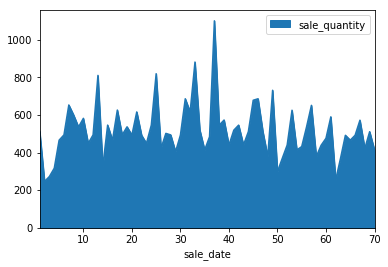

序列长度：70
序列方差：141.901343
序列均值：515.257143
车型ID：597927


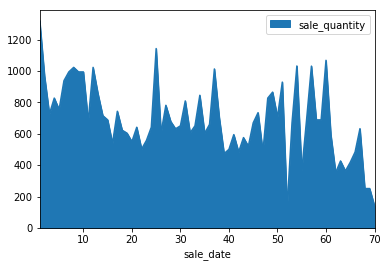

序列长度：70
序列方差：233.775040
序列均值：685.128571
车型ID：743957


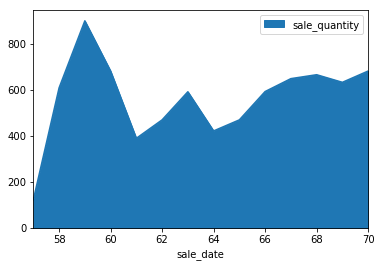

序列长度：14
序列方差：175.124635
序列均值：561.928571
车型ID：914348


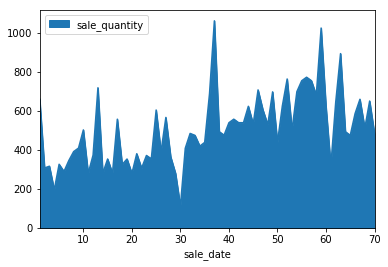

序列长度：70
序列方差：184.498391
序列均值：505.828571
车型ID：883691


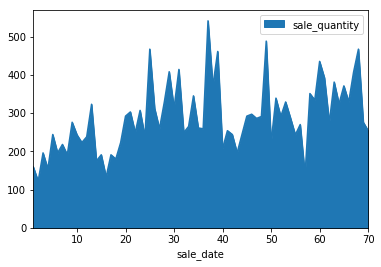

序列长度：70
序列方差：88.906307
序列均值：286.200000
车型ID：923841


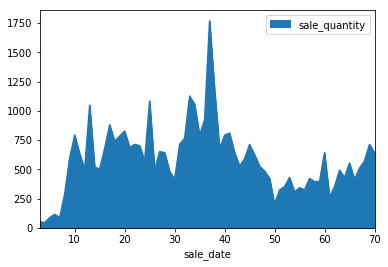

序列长度：68
序列方差：289.607667
序列均值：586.044118
车型ID：436105


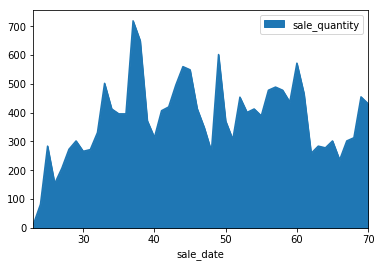

序列长度：48
序列方差：135.374474
序列均值：377.541667
车型ID：481950


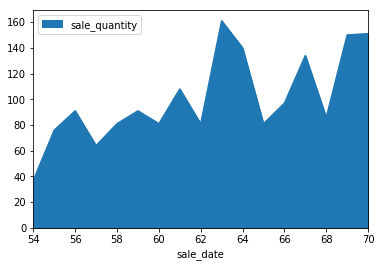

序列长度：17
序列方差：33.683752
序列均值：100.588235
车型ID：248352


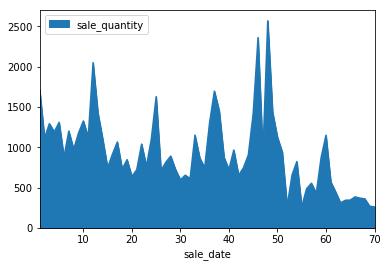

序列长度：70
序列方差：469.423337
序列均值：930.042857
车型ID：961362


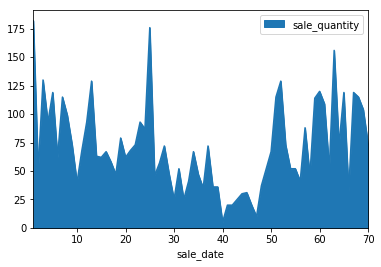

序列长度：70
序列方差：38.499679
序列均值：70.657143
车型ID：950264


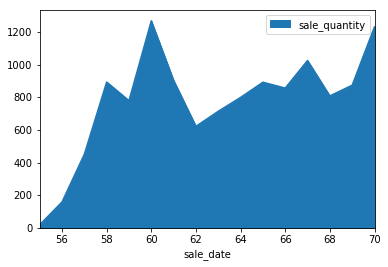

序列长度：16
序列方差：321.899386
序列均值：768.312500
车型ID：308913


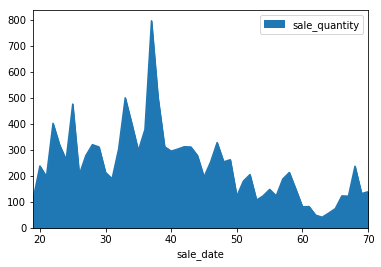

序列长度：52
序列方差：137.029338
序列均值：240.365385
车型ID：250658


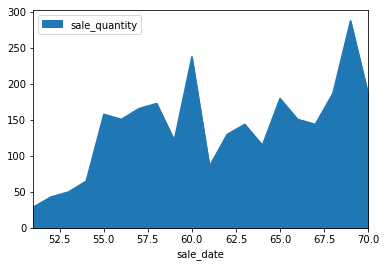

序列长度：20
序列方差：62.970846
序列均值：140.350000
车型ID：621073


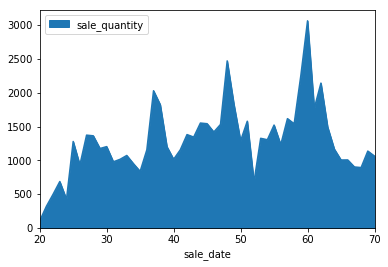

序列长度：51
序列方差：523.729326
序列均值：1287.156863
车型ID：198427


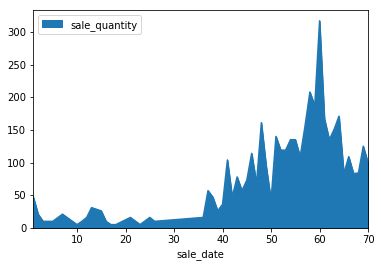

序列长度：53
序列方差：65.891963
序列均值：77.849057
车型ID：651782


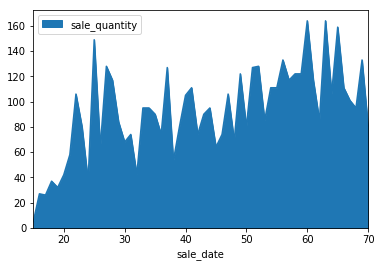

序列长度：56
序列方差：35.755864
序列均值：91.982143
车型ID：619401


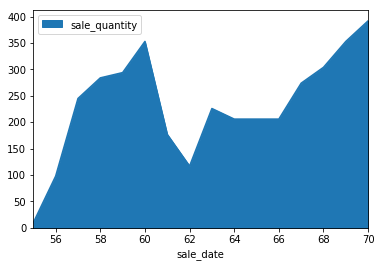

序列长度：16
序列方差：98.117575
序列均值：234.062500
车型ID：348641


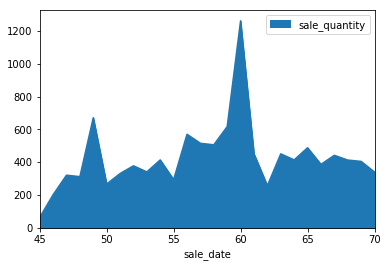

序列长度：26
序列方差：209.299579
序列均值：427.384615
车型ID：194450


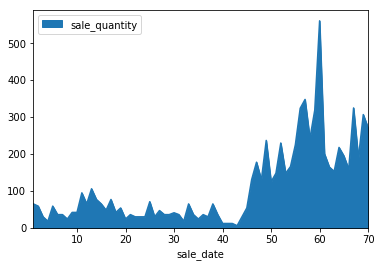

序列长度：69
序列方差：107.168291
序列均值：109.971014
车型ID：206765


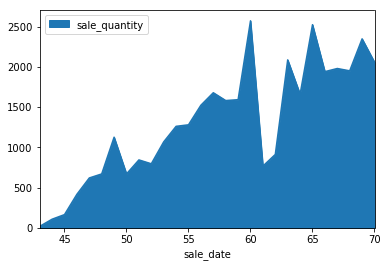

序列长度：28
序列方差：720.722012
序列均值：1293.178571
车型ID：178529


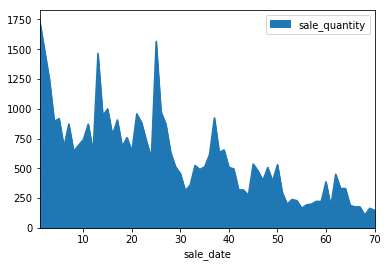

序列长度：70
序列方差：358.849114
序列均值：588.642857
车型ID：953842


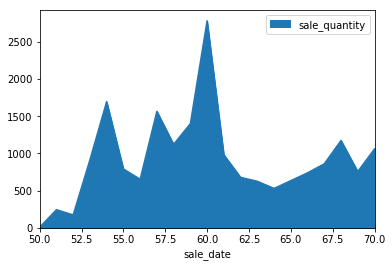

序列长度：21
序列方差：586.529135
序列均值：923.952381
车型ID：395234


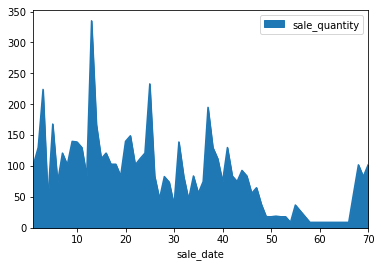

序列长度：62
序列方差：59.219035
序列均值：93.467742
车型ID：468392


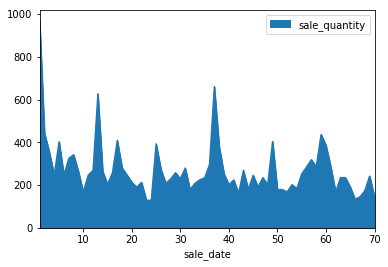

序列长度：70
序列方差：130.516154
序列均值：269.928571
车型ID：302513


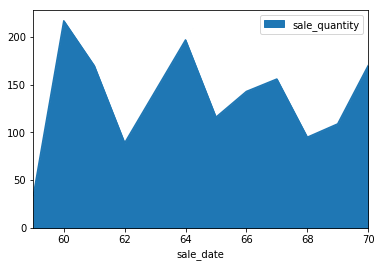

序列长度：12
序列方差：48.743304
序列均值：136.583333
车型ID：973106


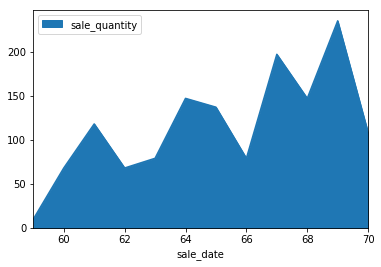

序列长度：12
序列方差：58.973805
序列均值：116.083333
车型ID：136916


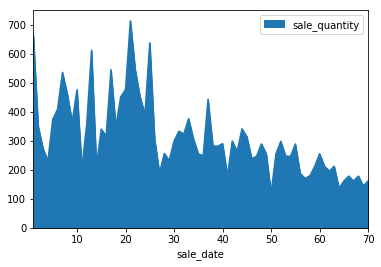

序列长度：70
序列方差：131.919147
序列均值：312.100000
车型ID：760412


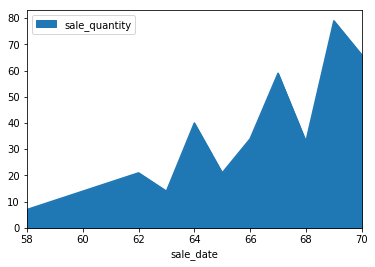

序列长度：10
序列方差：22.499778
序列均值：37.400000
车型ID：683364


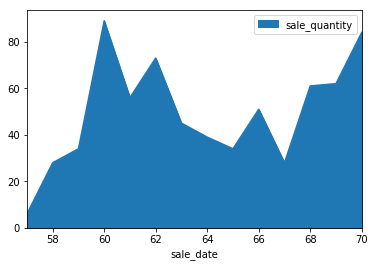

序列长度：14
序列方差：22.460850
序列均值：49.285714
车型ID：360648


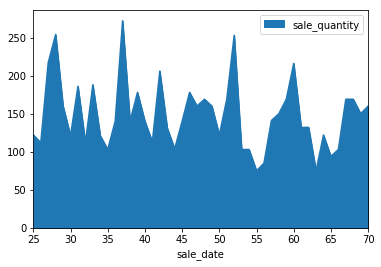

序列长度：46
序列方差：45.205898
序列均值：148.239130
车型ID：736094


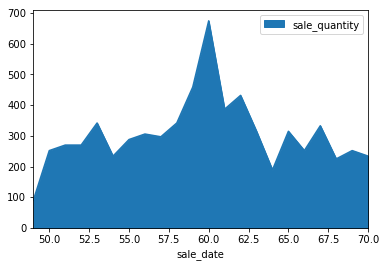

序列长度：22
序列方差：111.696802
序列均值：307.227273
车型ID：378536


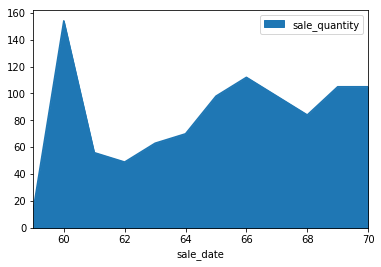

序列长度：12
序列方差：34.765884
序列均值：84.000000
车型ID：186250


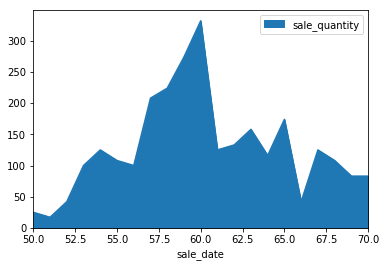

序列长度：21
序列方差：77.426053
序列均值：128.666667
车型ID：569154


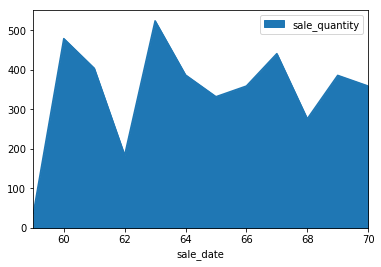

序列长度：12
序列方差：126.550605
序列均值：347.333333
车型ID：810398


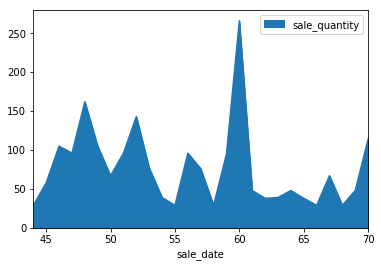

序列长度：27
序列方差：51.702404
序列均值：76.518519
车型ID：501564


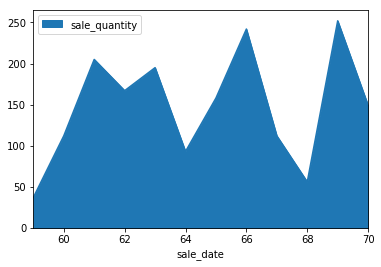

序列长度：12
序列方差：65.811389
序列均值：148.166667
车型ID：475895


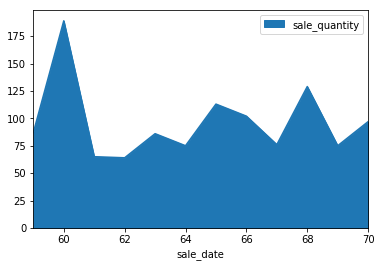

序列长度：12
序列方差：33.552198
序列均值：96.500000
车型ID：249875


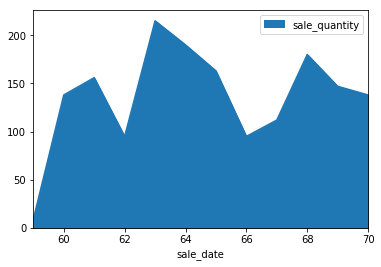

序列长度：12
序列方差：51.973551
序列均值：136.500000
车型ID：890189


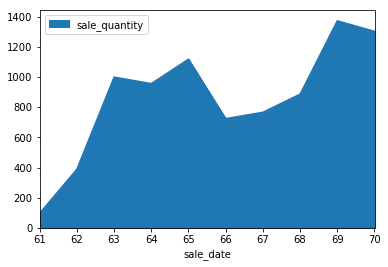

序列长度：10
序列方差：372.104676
序列均值：860.900000
车型ID：527765


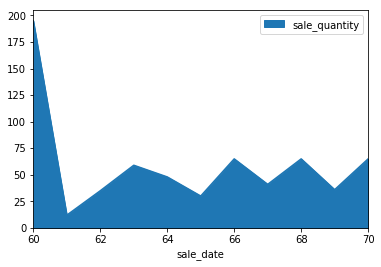

序列长度：11
序列方差：45.928439
序列均值：59.181818
车型ID：815230


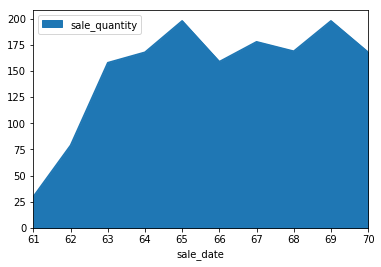

序列长度：10
序列方差：50.974994
序列均值：150.500000
车型ID：861459


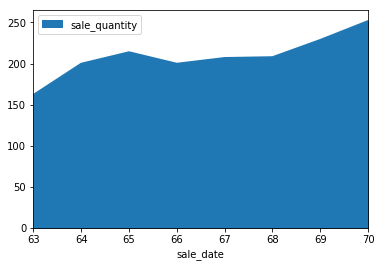

序列长度：8
序列方差：24.109127
序列均值：209.000000
车型ID：437063


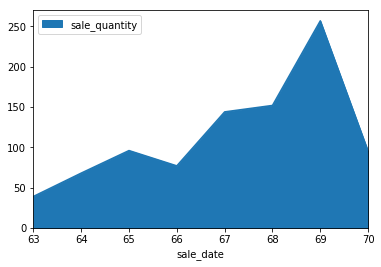

序列长度：8
序列方差：63.792633
序列均值：116.000000
车型ID：854548


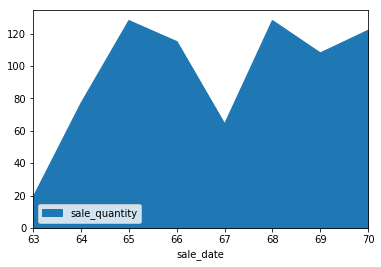

序列长度：8
序列方差：36.292002
序列均值：95.125000
车型ID：789290


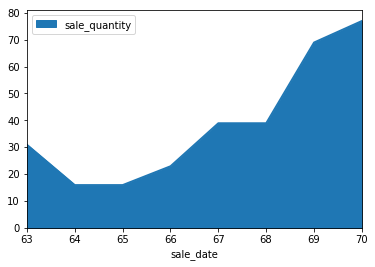

序列长度：8
序列方差：21.568206
序列均值：38.750000
车型ID：417803


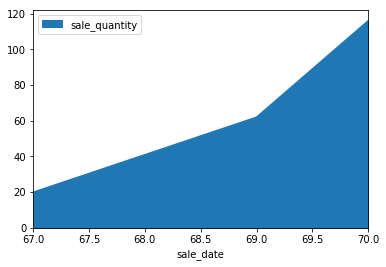

序列长度：4
序列方差：35.709768
序列均值：59.750000
车型ID：714150


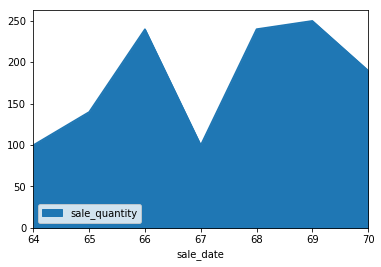

序列长度：7
序列方差：61.644140
序列均值：180.000000
车型ID：687270


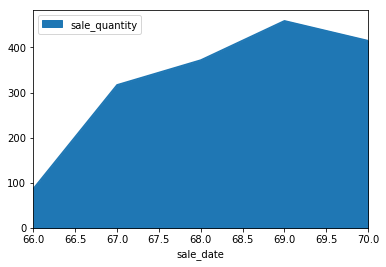

序列长度：5
序列方差：130.267417
序列均值：330.000000
车型ID：842246


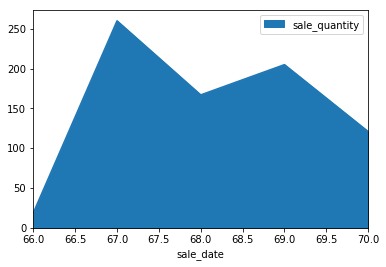

序列长度：5
序列方差：81.632347
序列均值：154.400000
车型ID：169673


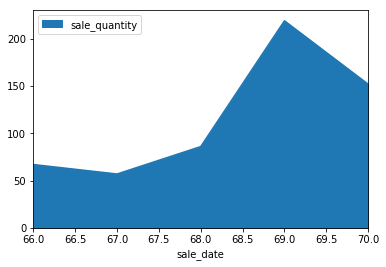

序列长度：5
序列方差：61.133951
序列均值：116.200000
车型ID：905061


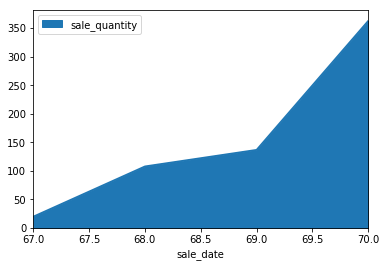

序列长度：4
序列方差：126.497036
序列均值：157.000000
车型ID：194201


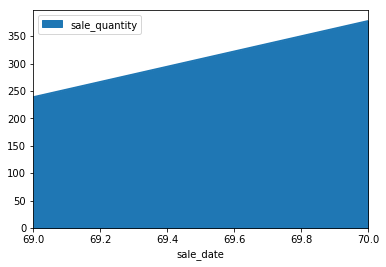

序列长度：2
序列方差：69.500000
序列均值：308.500000
车型ID：872180


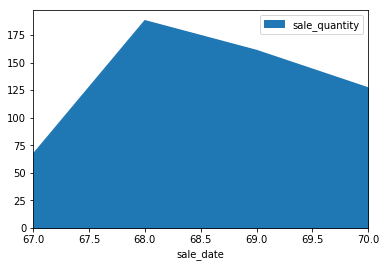

序列长度：4
序列方差：45.196100
序列均值：135.750000
车型ID：612523


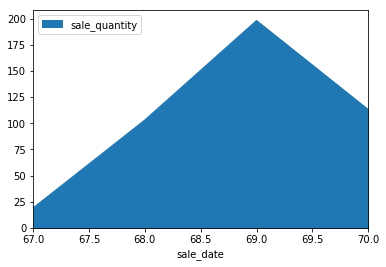

序列长度：4
序列方差：63.385231
序列均值：108.250000
车型ID：725137


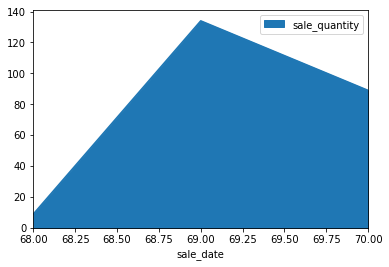

序列长度：3
序列方差：51.693541
序列均值：77.333333
车型ID：653436


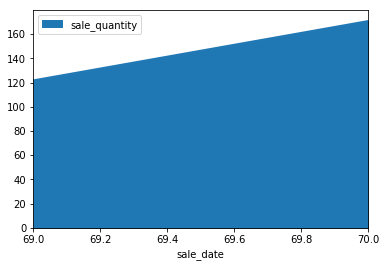

序列长度：2
序列方差：24.500000
序列均值：146.500000
车型ID：376193


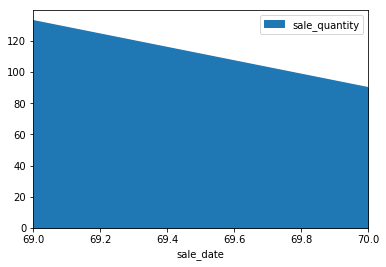

序列长度：2
序列方差：21.500000
序列均值：111.500000
车型ID：340175


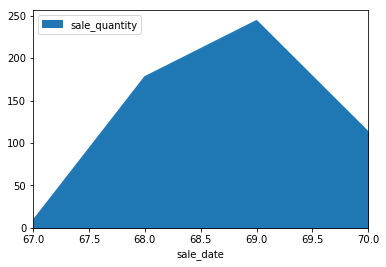

序列长度：4
序列方差：86.726582
序列均值：136.000000
车型ID：359378


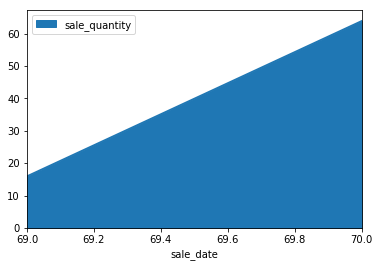

序列长度：2
序列方差：24.000000
序列均值：40.000000


In [143]:
# 观察每种车型的销量变化情况
sales_df = origin_train_df[["sale_date", "class_id", "sale_quantity"]].copy()
sales_df["sale_date"] = sales_df["sale_date"].apply(charge_sale_date)
for class_id in sales_df["class_id"].unique():
    print "车型ID：%d" % class_id
    sales_tmp = sales_df[sales_df["class_id"] == class_id][["sale_date", "sale_quantity"]].sort_values(
        ["sale_date"]).groupby(["sale_date"]).sum()
    sales_tmp.plot(kind="area")
    plt.show()
    print "序列长度：%d" % sales_tmp.size
    print "序列方差：%f" % np.std(sales_tmp["sale_quantity"])
    print "序列均值：%f" % np.average(sales_tmp["sale_quantity"])


In [151]:
# 用201710月数据作为201711的预测结果
sales_201710 = origin_train_df[origin_train_df["sale_date"] == 201710][["class_id", "sale_quantity"]].groupby(
    ["class_id"]).sum()
sales_201710["class_id"] = sales_201710.index
sales_201710["predict_quantity"] = sales_201710["sale_quantity"]
sales_201710["predict_date"] = "201711"
sales_201710[["predict_date", "class_id", "predict_quantity"]].to_csv("./baseline/baseling.csv", index=None)

In [173]:
# 用201710月和201709的数据均值作为201711的预测结果
sales_201710 = origin_train_df[origin_train_df["sale_date"] == 201710][["class_id", "sale_quantity"]].groupby([
    "class_id"]).sum()
sales_201709 = origin_train_df[origin_train_df["sale_date"] == 201709][["class_id", "sale_quantity"]].groupby([
    "class_id"]).sum()
sales = sales_201710.join(sales_201709, how="left", lsuffix="_x", rsuffix="_y")
sales["predict_quantity"] = (sales["sale_quantity_x"] + sales["sale_quantity_y"]) / 2
sales["predict_date"] = "201711"
sales["class_id"] = sales.index
sales[["predict_date", "class_id", "predict_quantity"]].to_csv("./20180122/result1.csv", index=None)

In [261]:
# 观察涨跌幅是否具有周期性
# 结论：周期性不明显
def charge(x):
    if x <= 60:
        return 0
    elif x > 60:
        return 1
    else:
        return -1
cyclicity_df = origin_train_df[["class_id", "sale_date", "sale_quantity"]].copy()
cyclicity_df["sale_date"] = cyclicity_df["sale_date"].apply(lambda date: (date / 100 - 2012) * 12 + date % 100)
#cyclicity_df = cyclicity_df[cyclicity_df["sale_date"] > 24]
cyclicity_df2 = cyclicity_df.copy()
cyclicity_df2["sale_date"] = cyclicity_df2["sale_date"] + 1
cyclicity_df3 = cyclicity_df.copy()
cyclicity_df3["sale_date"] = cyclicity_df3["sale_date"] + 12
cyclicity_df4 = cyclicity_df2.copy()
cyclicity_df4["sale_date"] = cyclicity_df4["sale_date"] + 12
cyclicity_df = cyclicity_df.groupby(["sale_date", "class_id"]).sum()
cyclicity_df2 = cyclicity_df2.groupby(["sale_date", "class_id"]).sum()
cyclicity_df3 = cyclicity_df3.groupby(["sale_date", "class_id"]).sum()
cyclicity_df4 = cyclicity_df4.groupby(["sale_date", "class_id"]).sum()
cyclicity_df = pd.merge(cyclicity_df, cyclicity_df2, left_index=True, right_index=True, how="inner")
cyclicity_df = pd.merge(cyclicity_df, cyclicity_df3, left_index=True, right_index=True, how="inner")
cyclicity_df = pd.merge(cyclicity_df, cyclicity_df4, left_index=True, right_index=True, how="inner")
cyclicity_df.columns = ["sale1", "sale2", "sale3", "sale4"]
cyclicity_df["sale2_sale1"] = (cyclicity_df["sale2"] - cyclicity_df["sale1"]).apply(lambda x: charge(x))
cyclicity_df["sale4_sale3"] = (cyclicity_df["sale4"] - cyclicity_df["sale3"]).apply(lambda x: charge(x))
cyclicity_df["flag"] = cyclicity_df["sale2_sale1"] == cyclicity_df["sale4_sale3"]
print cyclicity_df.size
print cyclicity_df[cyclicity_df["flag"]].size

27321
19607


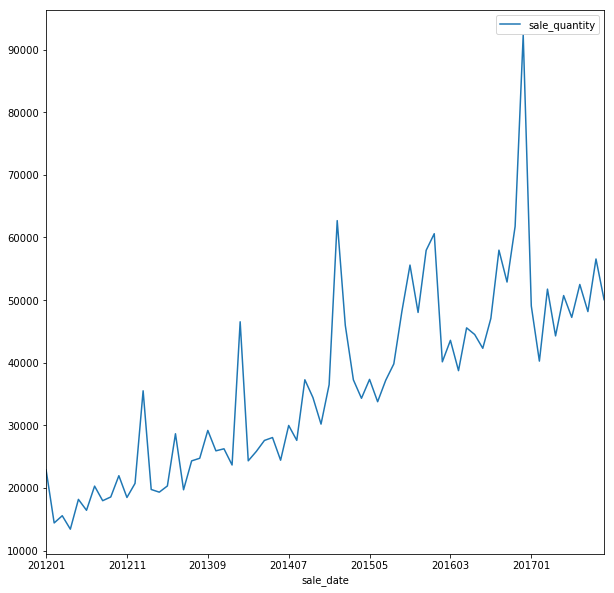

           sale_quantity
sale_date               
201201             22927
201202             14433
201203             15587
201204             13438
201205             18195
201206             16455
201207             20312
201208             17985
201209             18582
201210             21975
201211             18500
201212             20746
201301             35528
201302             19775
201303             19347
201304             20338
201305             28671
201306             19728
201307             24341
201308             24758
201309             29201
201310             25945
201311             26270
201312             23685
201401             46544
201402             24352
201403             25854
201404             27603
201405             28067
201406             24448
...                  ...
201505             37350
201506             33783
201507             37211
201508             39820
201509             48208
201510             55594
201511             48034


In [9]:
# 观察总人数变化趋势
sales_per_month = origin_train_df[["sale_date", "sale_quantity"]].copy()
sales_per_month["sale_date"] = sales_per_month["sale_date"].apply(lambda x: str(x))
sales_per_month = sales_per_month.groupby(["sale_date"]).sum()
sales_per_month.plot(figsize=[10, 10])
plt.show()
print sales_per_month

In [17]:
import copy
from sklearn import linear_model
category_names = ["sale_date", "class_id", "brand_id", "type_id", "level_id", "department_id", "if_MPV_id",
                  "if_luxurious_id"]
ori_label_name = "sale_quantity"
label_df = origin_train_df[["sale_date", "class_id", ori_label_name]].groupby(["sale_date", "class_id"]).sum()
# 训练预测销量的模型
train_category = origin_train_df[category_names].copy()
train_category["month"] = train_category["sale_date"].apply(lambda x: x % 100)
train_category["year"] = train_category["sale_date"].apply(lambda x: x / 100)
for column in train_category.columns:
    train_category[column] = train_category[column].apply(lambda x: str(x))
col_dummies = copy.copy(train_category.columns.values.tolist())
col_dummies.remove("sale_date")
train_category = pd.get_dummies(train_category[col_dummies])

# 将sale_date减一个月，为了方便后续结果的合并
def reduce_month(date):
    numeric_date = (date / 100 - 2012) * 12 + date % 100
    numeric_date -= 1
    return (numeric_date / 12 + 2012) * 100 + numeric_date % 12
train_category["sale_date"] = origin_train_df["sale_date"].apply(lambda x: reduce_month(x))
train_category["class_id"] = origin_train_df["class_id"]
train_category_sales_X = train_category.groupby(["sale_date", "class_id"]).mean()
train_category_sales_y = origin_train_df[["sale_date", "class_id", ori_label_name]].copy()
train_category_sales_y["sale_date"] = train_category_sales_y["sale_date"].apply(reduce_month)
train_category_sales_y = train_category_sales_y.groupby(["sale_date", "class_id"]).sum()
# 降了1个月后，所以取sale_date为201709的数据，实际上是201710的数据
test_category_sales_X = train_category[train_category["sale_date"] == 201709].copy()
test_category_sales_X["sale_date"] = 201710
test_category_sales_X["month_10"] = 0
test_category_sales_X["month_11"] = 1
test_category_sales_X = test_category_sales_X.groupby(["sale_date", "class_id"]).mean()
test_category_sales_X = pd.concat([train_category_sales_X, test_category_sales_X])
linear = linear_model.LinearRegression()
linear.fit(train_category_sales_X.values, train_category_sales_y.values)
result_linear = linear.predict(test_category_sales_X.values)
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(train_category_sales_X.values, train_category_sales_y.values)
result_ridge = ridge.predict(test_category_sales_X.values)
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train_category_sales_X.values, train_category_sales_y.values)
result_lasso = lasso.predict(test_category_sales_X.values)
test_category_sales_X["sales_predict_linear"] = result_linear
test_category_sales_X["sales_predict_ridge"] = result_ridge
test_category_sales_X["sales_predict_lasso"] = result_lasso

test_category_sales_X["sales"] = train_category_sales_y
test_category_sales_X.to_csv("test.csv", index=None)

# 训练预测价格的模型
def charge_price(price):
    if price == '-':
        return np.NaN
    else:
        return float(price)
price_df = origin_train_df[["sale_date", "class_id", "price"]].copy()
price_df["price"] = price_df["price"].apply(charge_price)

# price_df = origin_train_df[["sale_date", "class_id", "price"]].groupby(["sale_date", "class_id"]).mean()
price_df["sale_date"] = price_df["sale_date"].apply(reduce_month)
price_df = price_df.groupby(["sale_date", "class_id"]).mean()
train_category_price_X = train_category.groupby(["sale_date", "class_id"]).mean()[~price_df["price"].isnull()]
train_category_price_y = price_df[~price_df["price"].isnull()]["price"]
# 降了1个月后，所以取sale_date为201709的数据，实际上是201710的数据
test_category_price_X = train_category[train_category["sale_date"] == 201709].copy()
test_category_price_X["sale_date"] = 201710
test_category_price_X["month_10"] = 0
test_category_price_X["month_11"] = 1
test_category_price_X = test_category_price_X.groupby(["sale_date", "class_id"]).mean()
test_category_price_X = pd.concat([train_category_price_X, test_category_price_X])
linear = linear_model.LinearRegression()
linear.fit(train_category_price_X.values, train_category_price_y.values)
result_linear = linear.predict(test_category_price_X.values)
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(train_category_price_X.values, train_category_price_y.values)
result_ridge = ridge.predict(test_category_price_X.values)
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train_category_price_X.values, train_category_price_y.values)
result_lasso = lasso.predict(test_category_price_X.values)
test_category_price_X["price_predict_linear"] = result_linear
test_category_price_X["price_predict_ridge"] = result_ridge
test_category_price_X["price_predict_lasso"] = result_lasso

test_category_price_X["sales"] = train_category_price_y
test_category_price_X.to_csv("test.csv")